In [1]:
import string
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('poems.csv')

In [3]:
df['poem'] = df['poem'].str.findall(r"\w+-\w+|[\w']+|\|")\
    .apply(lambda x: ' '.join(x).lower() if type(x)==list else '')

df['poem'] = df['poem'].apply(lambda x: x.lower() if type(x)==str else '')
df = df[~df['poem'].str.contains('і')]
df['poem'] = df['poem'].apply(lambda x: x.lower()).apply(lambda x: x.split('|'))

In [4]:
def clear_residual_spaces(poem_list):
    clean_poem = []
    for line in poem_list:
        clean_line = ' '.join([x for x in line.split() if len(x)>0])
        clean_poem.append(clean_line)
    return clean_poem

def clear_lines_with_numbers(poem_list):
    clean_poem = []
    for line in poem_list:
        if not any([True for x in line if x in '1234567890']):
            clean_poem.append(line)
    return clean_poem

def clear_lines_with_links(poem_list):
    clean_poem = []
    for line in poem_list:
        if 'http' not in line:
            clean_poem.append(line)
    return clean_poem

def clear_short_lines(poem_list, n_times_lower=4):
    clean_poem = []
    if len(poem_list)==0:
        clean_poem = np.nan
    else:
        avg_line_len = sum([len(x) for x in poem_list])/len(poem_list)
        for line in poem_list:
            if len(line) > avg_line_len//n_times_lower:
                clean_poem.append(line)
    return clean_poem

df['poem'] = df['poem'].apply(clear_residual_spaces)
df['poem'] = df['poem'].apply(clear_lines_with_links)
df['poem'] = df['poem'].apply(clear_lines_with_numbers)
df['poem'] = df['poem'].apply(clear_short_lines)
df.dropna(inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000186C9818080>,
      dtype=object)

<Figure size 1152x648 with 0 Axes>

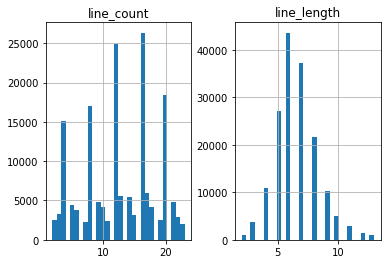

In [31]:
df['line_count'] = df['poem'].apply(lambda x: len(x))
df = df[df['line_count']>1]
df = df[df['line_count']<df['line_count'].quantile(0.85)]

df['line_length'] = df['poem'].apply(lambda x: max([len(y.split()) for y in x]))
df = df[(df['line_lenght']<14)&(df['line_lenght']>=2)]

plt.figure(figsize=(16,9))
df[['line_count', 'line_length']].hist(bins=30)

In [49]:
df[['poem']].to_csv('poems_processed.csv', index=False)

C:\Users\Valeric\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [30]:
df[df['line_count']==2]['poem'].sample(1).values[0]

['попугайчики любовью занимаются', 'а моё воображение дурью мается']

In [32]:
df[df['poem'].apply(lambda x: ''.join(x)).str.contains('атлету')]['poem'].values

array([list(['остынь не приставай к атлету', 'он превратит тебя в котлету']),
       list(['она ждала лишь этот день', 'сердечки нарезала', 'и в них признания в любви красиво расписала', 'хвать валентинки в кулачек духами надушила', 'и покидала в рюкзачек тому кого любила', 'а у него зеленый вид в столовке съел катлету', 'влетает пулей в туалет а там бумаги нету', 'рукой в рюкзак полез а там бумажки пахнут вкусно', 'он не по назначению их задействовал искусно', 'промчался века четвертак', 'она его забыла', 'и хорошо что было так', 'что в унитазе смыло', 'свой бизнес у нее теперь', 'толчек в центральном парке', 'как хорошо что в мире есть', 'хреновые кухарки', 'а он скололся все просрал', 'и нет пути обратно', 'питайтесь лучше господа', 'влюбляйтесь аккуратно'])],
      dtype=object)

In [6]:
len(df)

220

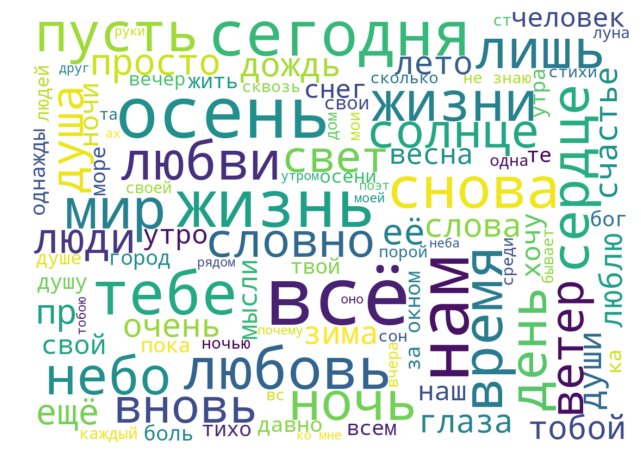

In [17]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

SAVE_FIG = True

STOP_WORDS = stopwords.words('russian')
STOP_WORDS.extend(['http', 'https', 'www', 'WWW' 'com', 'ru', 'это'])

text = df['poem'].to_string(index=False).replace('\n', '').lower()
wordcloud = WordCloud(width=1100,
                      height=800,
                      max_font_size=150,
                      max_words=100,
                      background_color="white",
                      stopwords=STOP_WORDS).generate(text)
plt.figure(figsize=(11,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
if SAVE_FIG:
    plt.savefig(f'wordcloud.png')
plt.show()